# Dfsu - Vertical Profile
This notebooks demonstrates plotting of vertical profile dfsu. 

In [1]:
import matplotlib.pyplot as plt
import mikeio

In [2]:
filename = "../tests/testdata/oresund_vertical_slice.dfsu"
ds = mikeio.read(filename)
ds

<mikeio.Dataset>
dims: (time:3, element:441)
time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00 (3 records)
geometry: DfsuVerticalProfileSigmaZ (441 elements, 4 sigma-layers, 5 z-layers)
items:
  0:  Temperature <Temperature> (degree Celsius)
  1:  Salinity <Salinity> (PSU)

In [3]:
g = ds.geometry
g

Flexible Mesh Geometry: DfsuVerticalProfileSigmaZ
number of nodes: 550
number of elements: 441
number of layers: 9 (4 sigma-layers, max 5 z-layers)
projection: UTM-33

The geometry can be visualized from above (to be shown on a map) using g.plot() and from the side showing the 2dv transect mesh with g.plot.mesh(). 

Let's show the transect on top of the model domain...

In [35]:
dfs = mikeio.open("../tests/testdata/oresundHD_run1.dfsu")
model_domain = dfs.geometry

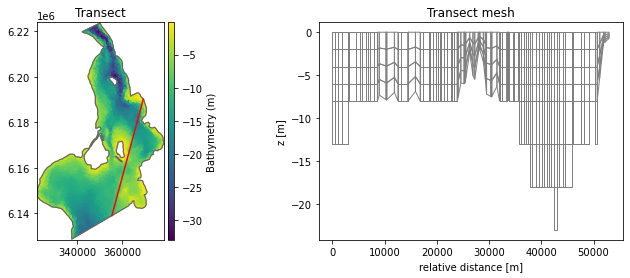

In [43]:
_, ax = plt.subplots(1,2,figsize=(12,4))
# left-side plot
model_domain.plot(ax=ax[0], title="Transect")
g.plot(color="r", ax=ax[0])

# right-side plot
g.plot.mesh(ax=ax[1], title="Transect mesh");

We would like to show two points of interest A and B on the map. The geometry object has a method for finding the nearest relative position...

In [41]:
ptA = [3.55e+05,  6.145e+06]
ptB = [3.62e+05,  6.166e+06] 
distA = g.get_nearest_relative_distance(ptA)
distB = g.get_nearest_relative_distance(ptB)
distA, distB

(5462.327351236415, 27589.50308534942)

Let's now visualize the points on the map and transect

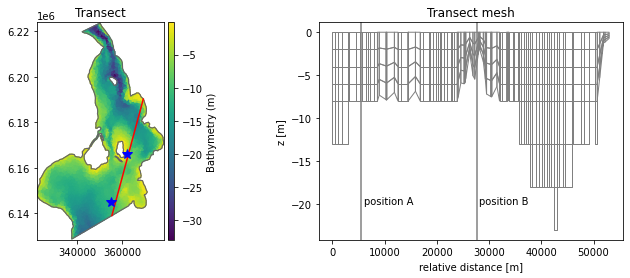

In [42]:
_, ax = plt.subplots(1,2,figsize=(12,4))
model_domain.plot(ax=ax[0], title="Transect")
g.plot(color="r", ax=ax[0])
ax[0].plot(*ptA, color="b", marker="*", markersize=10)
ax[0].plot(*ptB, color="b", marker="*", markersize=10)

g.plot.mesh(ax=ax[1], title="Transect mesh");
ax[1].axvline(distA, color="0.5")
ax[1].text(distA + 500, -20, 'position A')
ax[1].axvline(distB, color="0.5")
ax[1].text(distB + 500, -20, 'position B');

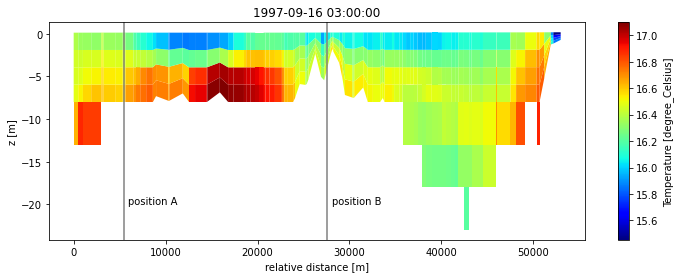

In [20]:
ax = ds.Temperature.isel(time=2).plot(figsize=(12,4))
ax.axvline(distA, color="0.5")
ax.text(distA + 500, -20, 'position A')
ax.axvline(distB, color="0.5")
ax.text(distB + 500, -20, 'position B');

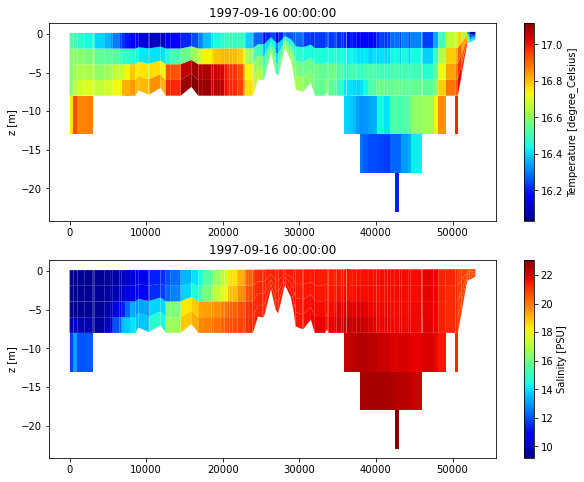

In [4]:
time_step = 1

fig, ax = plt.subplots(2,1,figsize=(10,8))
ds.Temperature[time_step].plot(ax=ax[0])
ds.Salinity[time_step].plot(ax=ax[1])